In [4]:
%load_ext autoreload
%autoreload 2

import yfinance as yf
from pandas_ml.patched import pd
from pandas_ml.transformers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


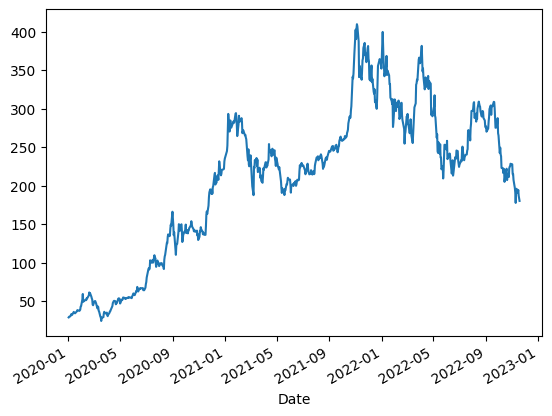

In [2]:
df = yf.Ticker("TSLA").history('max')['2020-01-1':]
ax = df["Close"].plot()

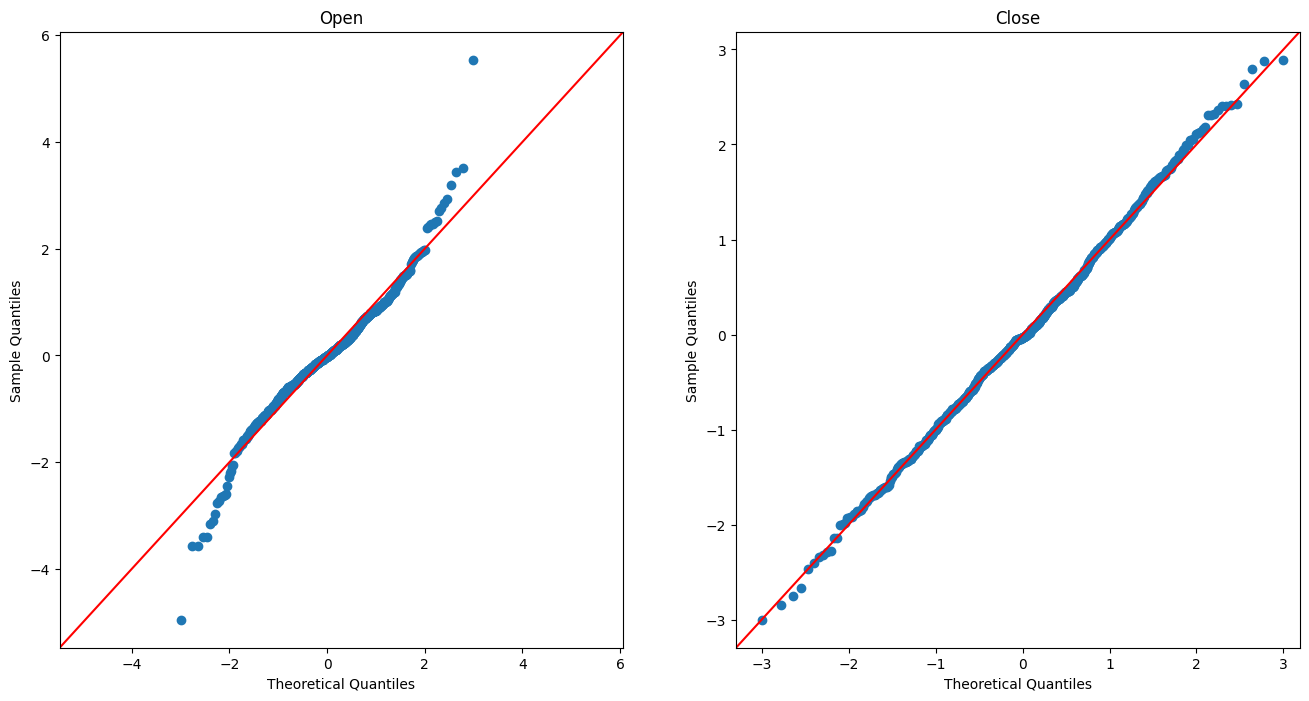

In [9]:
df.ml.transform(
    Flow("Open") >> PercentChange() >> LogNormalizer(),
    Flow("Close") >> PercentChange() >> LambertGaussianizer(),
).ml.qqplot()